In [33]:
import pm4py

log = pm4py.read_xes("no_duplicates.xes")

parsing log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

In [34]:
log["concept:name"].value_counts()

concept:name
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                                      58589
Start:GreenNode.get_RawKind\nEnd:GreenNode.get_RawKind                                                                                      49664
End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                                  42019
Start:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                                42019
Start:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags                                      34110
                                                                                                                                            ...  
Start:Syntax.InternalSyntax.SyntaxList+WithLotsOfChildren..ctor                                                

In [35]:
log['concept:name'].value_counts(normalize = True) * 100

concept:name
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                                      4.503185
Start:GreenNode.get_RawKind\nEnd:GreenNode.get_RawKind                                                                                      3.817204
End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                                  3.229605
Start:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                                3.229605
Start:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags                                      2.621714
                                                                                                                                              ...   
Start:Syntax.InternalSyntax.SyntaxList+WithLotsOfChildren..ctor                              

In [74]:
def remove_events_two_sided(event_log):
    value_counts_normalized = event_log['concept:name'].value_counts(normalize = True) * 100
    values_above_threshold = value_counts_normalized[(value_counts_normalized >= 0.1) & (value_counts_normalized <= 0.9)].index
    return event_log[event_log['concept:name'].isin(values_above_threshold)]

log_filt = remove_events_two_sided(log)
log_filt

concept:name  \
43                        Start:PooledObjects.ArrayBuilder   
45                          Start:PooledObjects.ObjectPool   
46                            End:PooledObjects.ObjectPool   
48                          Start:PooledObjects.ObjectPool   
49                        Start:PooledObjects.ArrayBuilder   
...                                                    ...   
1301035  Start:Text.TextSpan.get_Start\nEnd:Text.TextSp...   
1301036  Start:Text.TextSpan.get_Length\nEnd:Text.TextS...   
1301039  Start:DiagnosticInfo.get_Severity\nEnd:Diagnos...   
1301051                     Start:PooledObjects.ObjectPool   
1301052                       End:PooledObjects.ObjectPool   

                          time:timestamp case:concept:name  
43      2025-01-10 20:01:47.311432+00:00                 1  
45      2025-01-10 20:01:47.312071+00:00                 1  
46      2025-01-10 20:01:47.312109+00:00                 1  
48      2025-01-10 20:01:47.312197+00:00                 1  
49      2025-01-10 20:01:47.312591+00:00                 1  
...                                  ...               ...  
1301035 2025-01-10 20:03:37.599267+00:00                12  
1301036 2025-01-10 20:03:37.599268+00:00                12  
1301039 2025-01-10 20:03:37.599270+00:00                12  
1301051 2025-01-10 20:03:37.599443+00:00                12  
1301052 2025-01-10 20:03:37.599444+00:00                12  

[329470 rows x 3 columns]

In [41]:
log_filt['concept:name'].value_counts()

concept:name
Start:CSharp.Syntax.InternalSyntax.SyntaxToken+SyntaxTokenWithTrivia..ctor                                                        11192
End:CSharp.Syntax.InternalSyntax.SyntaxToken+SyntaxTokenWithTrivia..ctor                                                          11192
Start:GreenNode+NodeFlagsAndSlotCount.get_SmallSlotCount\nEnd:GreenNode+NodeFlagsAndSlotCount.get_SmallSlotCount                  10881
Start:GreenNode.get_SlotCount                                                                                                     10213
End:GreenNode.get_SlotCount                                                                                                       10213
Start:PooledObjects.ArrayBuilder                                                                                                  10112
Start:Collections.Internal.SegmentedArrayHelper.GetSegmentShift\nEnd:Collections.Internal.SegmentedArrayHelper.GetSegmentShift     9108
Start:Collections.Internal.Segmente

In [42]:
heuristics_net = pm4py.discover_heuristics_net(log_filt.copy())

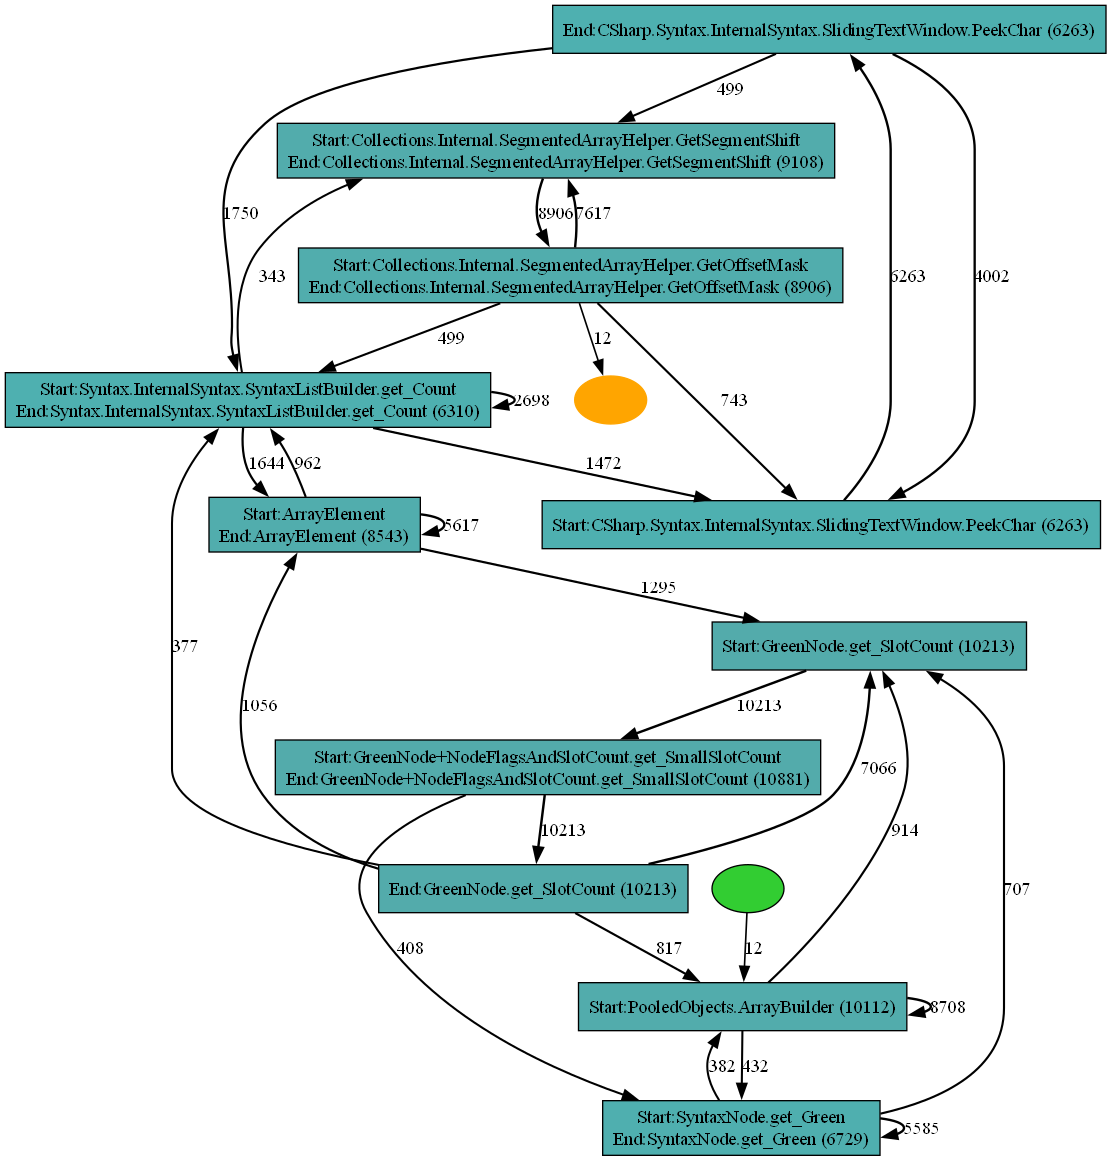

In [43]:
pm4py.view_heuristics_net(heuristics_net)

In [44]:
pm4py.fitness_token_based_replay(log_filt, *pm4py.convert_to_petri_net(heuristics_net))

replaying log with TBR, completed traces ::   0%|          | 0/11 [00:00<?, ?it/s]

{'perc_fit_traces': 0.0,
 'average_trace_fitness': 0.9806964143165144,
 'log_fitness': 0.9811860601784911,
 'percentage_of_fitting_traces': 0.0}

In [45]:
petri_net = pm4py.discover_petri_net_inductive(log_filt)

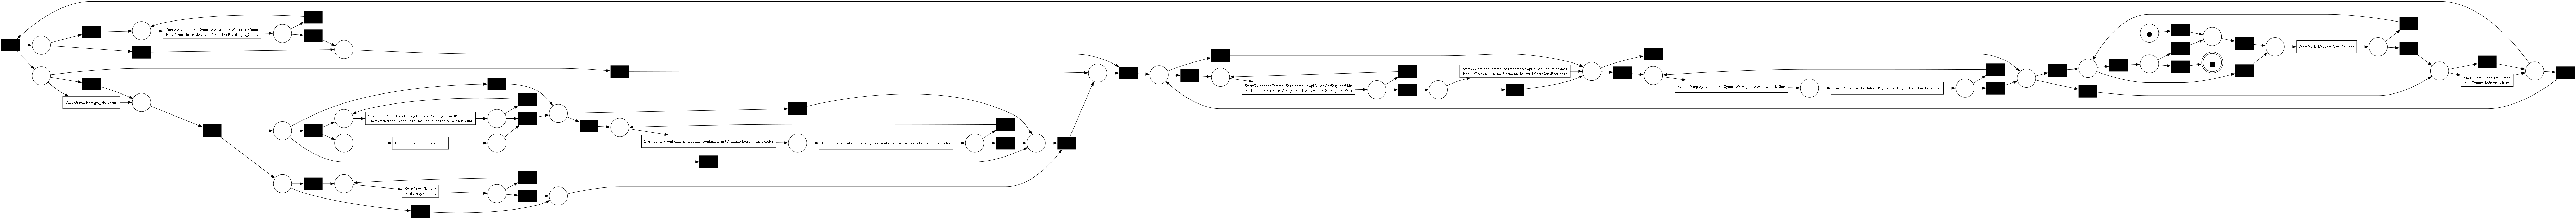

In [46]:
pm4py.view_petri_net(*petri_net)

In [47]:
pm4py.fitness_token_based_replay(log_filt, *petri_net)

replaying log with TBR, completed traces ::   0%|          | 0/11 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [48]:
bpmn = pm4py.discover_bpmn_inductive(log_filt)

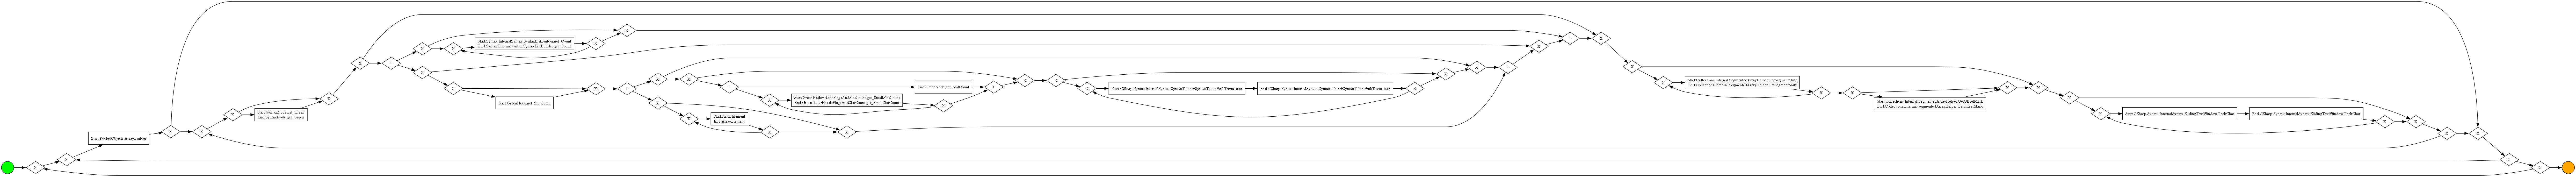

In [49]:
pm4py.view_bpmn(bpmn)

In [50]:
pm4py.fitness_token_based_replay(log_filt, *pm4py.convert_to_petri_net(bpmn))

replaying log with TBR, completed traces ::   0%|          | 0/11 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [51]:
process_tree = pm4py.discover_process_tree_inductive(log_filt)

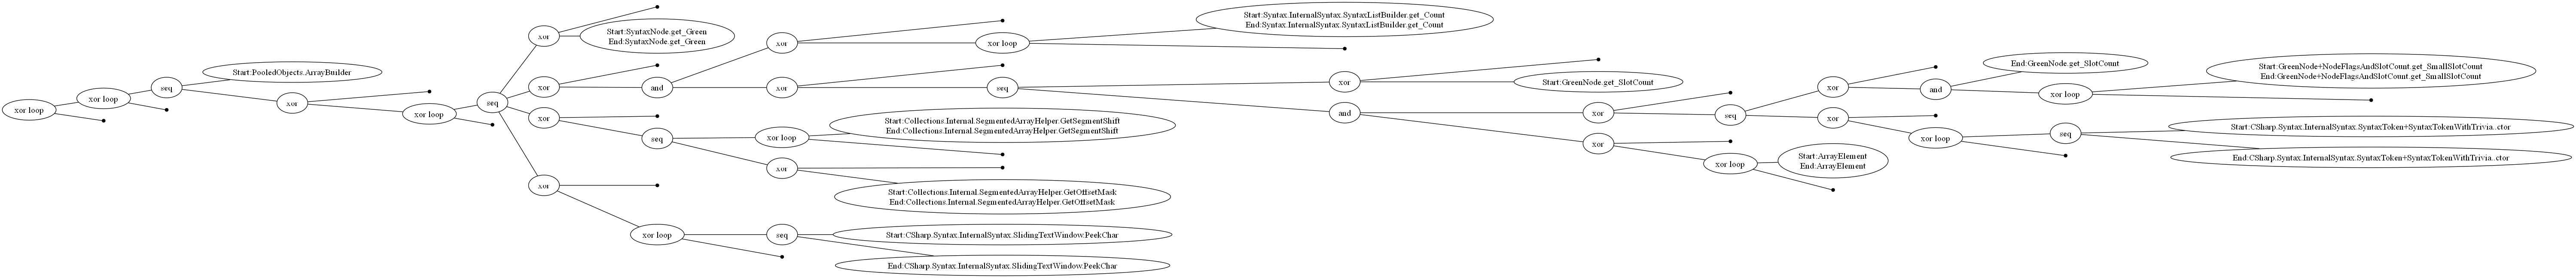

In [52]:
pm4py.view_process_tree(process_tree)

In [53]:
pm4py.fitness_token_based_replay(log_filt, *pm4py.convert_to_petri_net(process_tree))

replaying log with TBR, completed traces ::   0%|          | 0/11 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [54]:
transition_system = pm4py.discover_transition_system(log_filt)

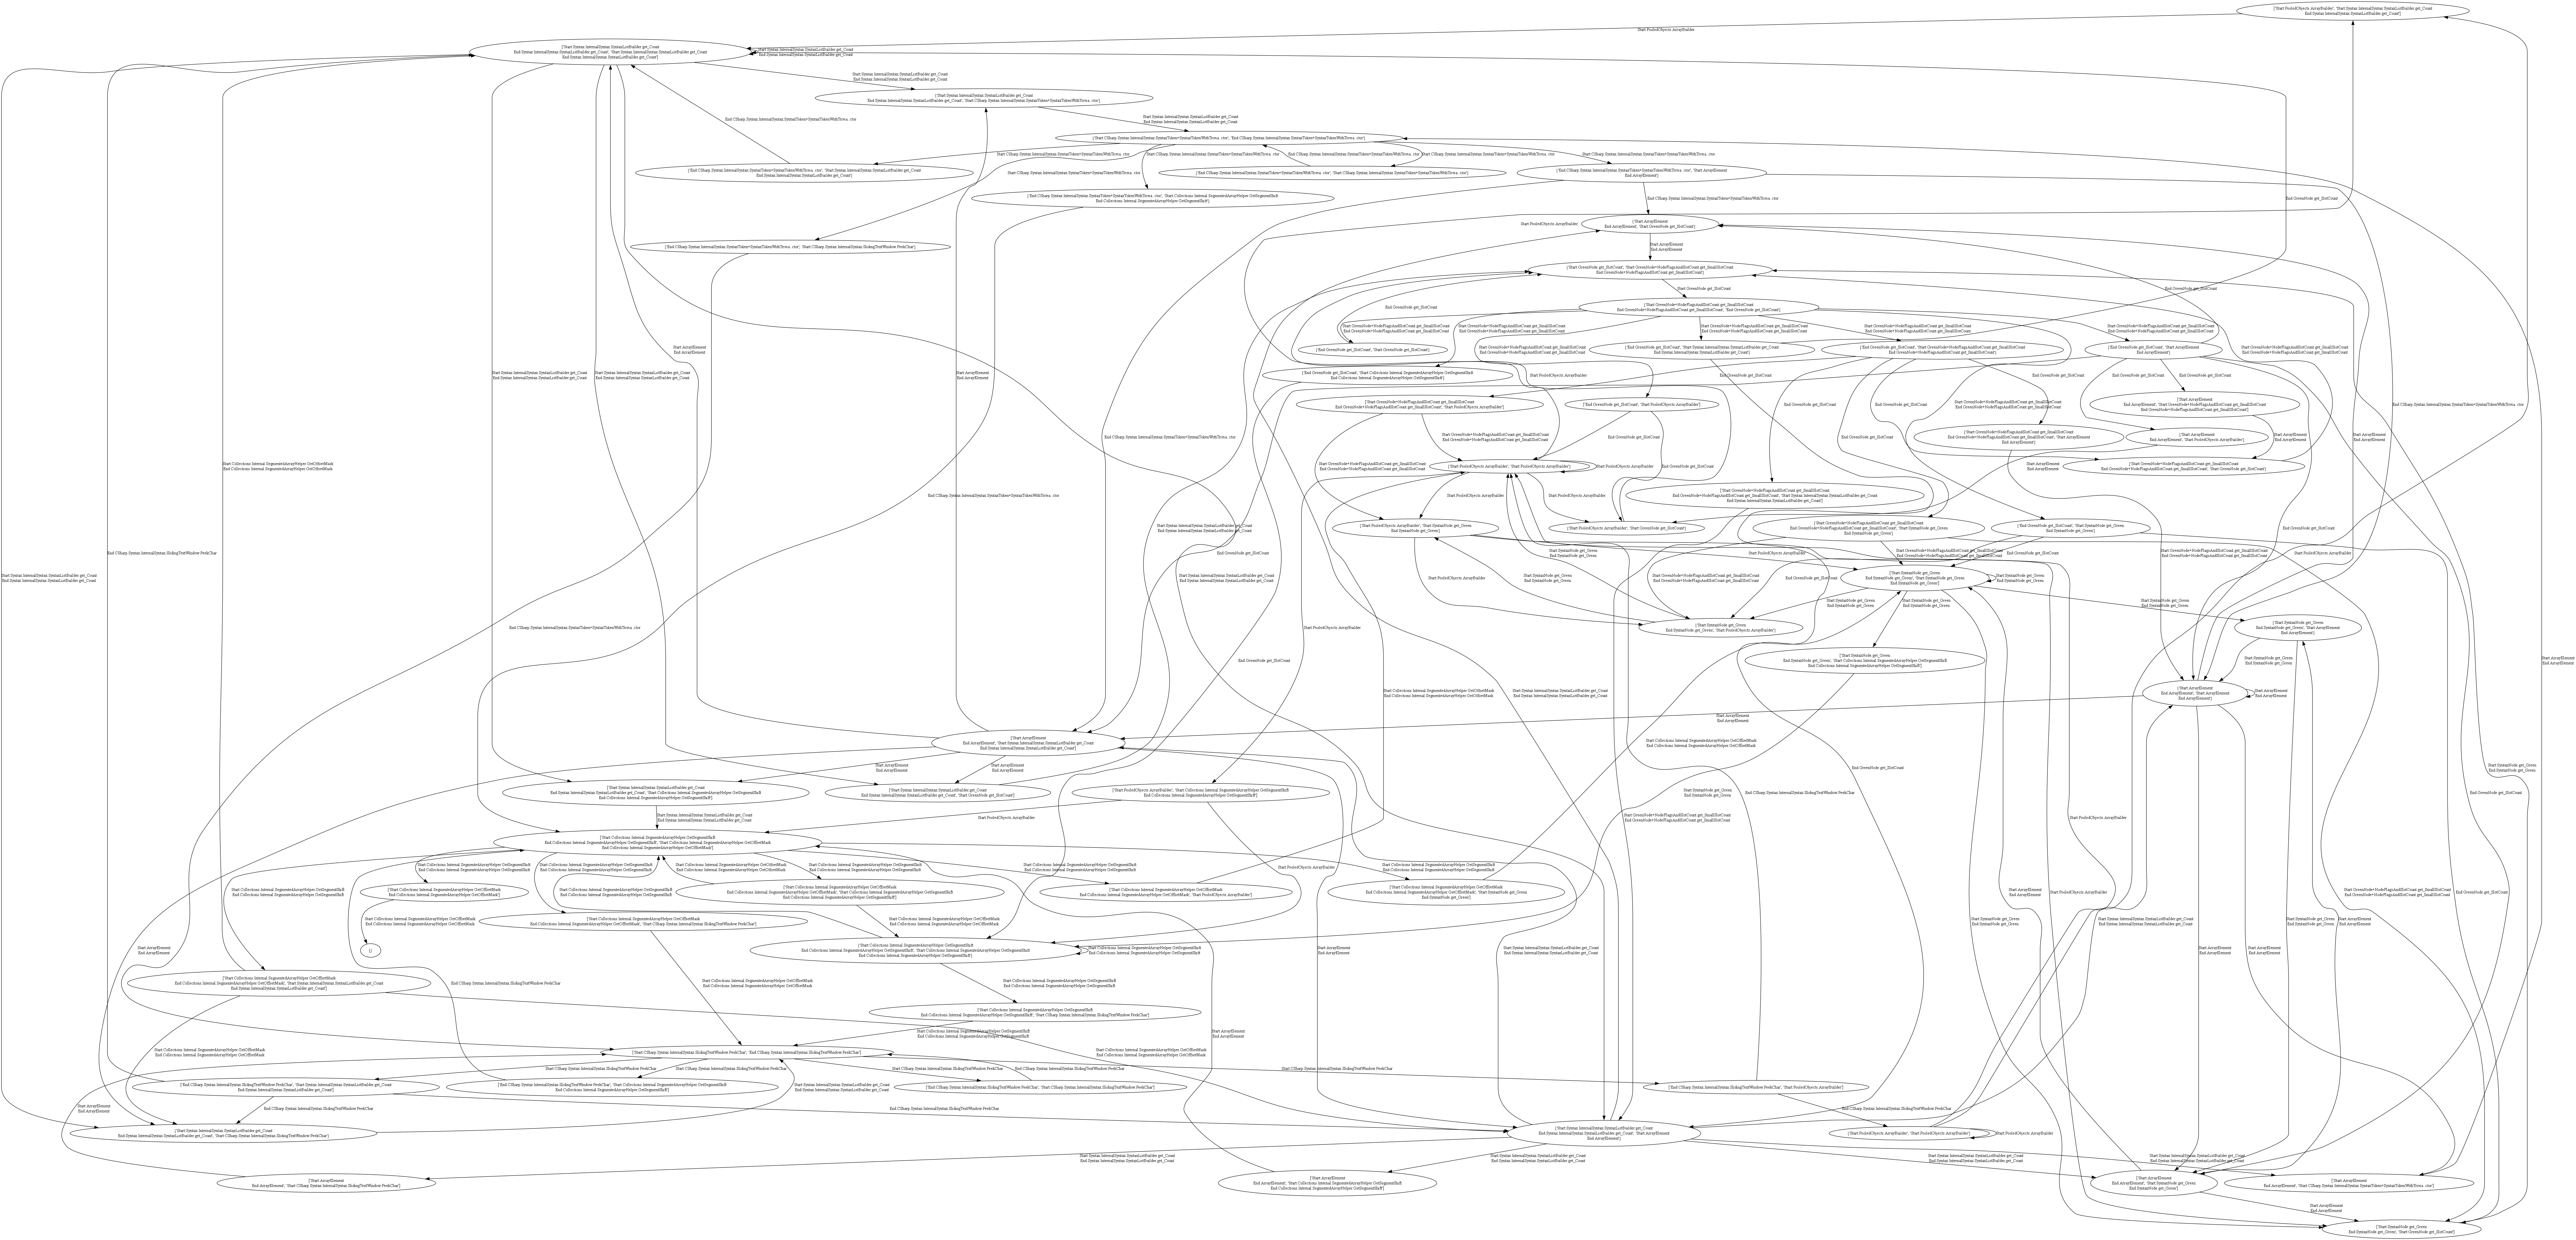

In [55]:
pm4py.view_transition_system(transition_system)

In [56]:
powl = pm4py.discover_powl(log_filt)

In [59]:
pm4py.view_powl(powl)

In [60]:
pm4py.fitness_token_based_replay(log_filt, *pm4py.convert_to_petri_net(powl))

replaying log with TBR, completed traces ::   0%|          | 0/11 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [61]:
footprints = pm4py.discover_footprints(log_filt)

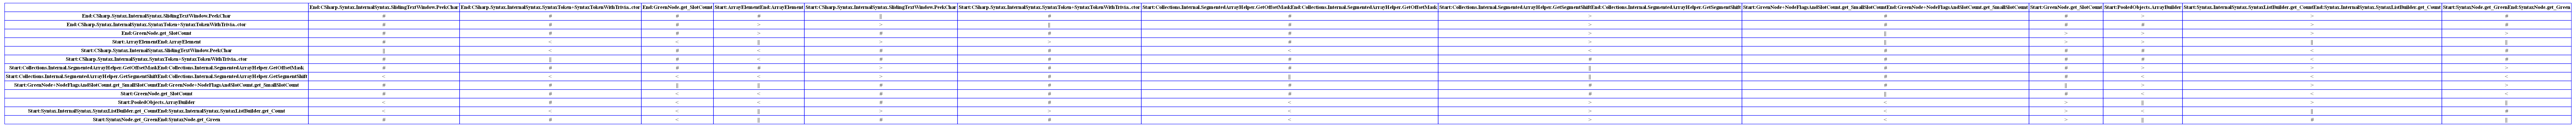

In [62]:
pm4py.view_footprints(footprints)

In [66]:
petri_net = pm4py.discover_petri_net_alpha(log_filt.copy())

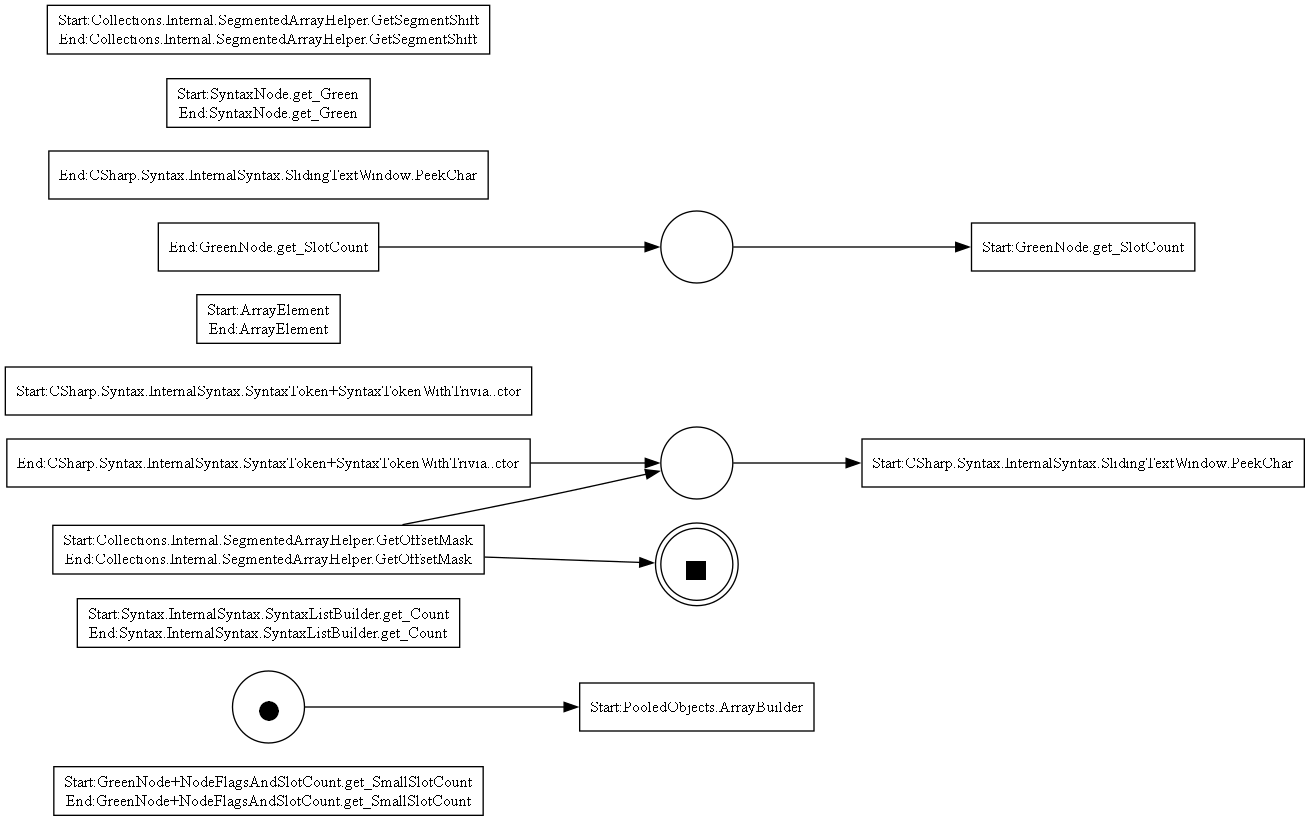

In [67]:
pm4py.view_petri_net(*petri_net)

In [68]:
pm4py.fitness_token_based_replay(log_filt, *petri_net)

replaying log with TBR, completed traces ::   0%|          | 0/11 [00:00<?, ?it/s]

{'perc_fit_traces': 0.0,
 'average_trace_fitness': 0.47295098643140204,
 'log_fitness': 0.5067644611158271,
 'percentage_of_fitting_traces': 0.0}